<a href="https://colab.research.google.com/github/carlos-castellanos99/Data-Science-Program-TEC/blob/main/DS_C3_SC1_CarlosDanielCastellanosMelzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DS_C3_SC1 - PLATAFORMAS DE VISUALIZACIÓN**

---

**Reto: Explorando el índice de felicidad**

NOMBRE DEL PARTICIPANTE: Carlos Daniel Castellanos Melzer

1.	Genera una libreta en Google Colab para el reto, cuya estructura esté basada en los análisis solicitados.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

2.	Descarga el archivo: happiness_report.csv y guarda, en un dataframe (`happiness`), todos sus registros.

In [3]:
#Cargamos los archivos para trabajar con ellos
from google.colab import files
uploaded = files.upload()

happiness =  pd.read_csv('/content/happiness_report.csv')

Saving happiness_report.csv to happiness_report.csv


3.	A partir del dataframe happiness obtén otro (`mexico`) donde sólo almacenes la información de México. Haz que la columna `Country or region` quede como índice. 

In [4]:
mexico = happiness[happiness['Country or region'] == "Mexico"]

# Establecer la columna 'Country or region' como índice
mexico = mexico.set_index('Country or region')

mexico.head()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Mexico,23,6.595,1.07,1.323,0.861,0.433,0.074,0.073


4.	Obtén un histograma del puntaje (`score`) para identificar el rango o clase más frecuente. Ubica el valor de México con una etiqueta de texto. 

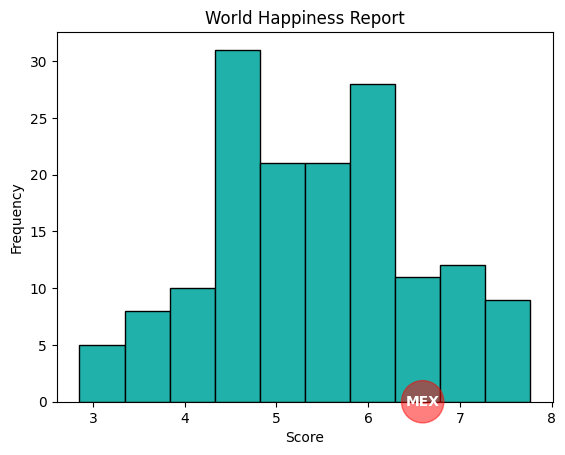

In [5]:
#Crea el histograma
plt.hist(happiness["Score"], bins=10, color ="lightseagreen", edgecolor="black");

# Agrega etiquetas y título
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('World Happiness Report');

# Agrega una etiqueta de texto
plt.xticks([3, 4, 5, 6, 7, 8]);

plt.text(mexico["Score"], 0, "MEX", fontsize=10, color='white', fontweight='bold', ha='center', va='center', bbox=dict(facecolor='red', edgecolor='red', boxstyle='circle', alpha=0.5));

5.	Construye un box plot para la columna esperanza de vida (`Healthy life expectancy`). Ubica el valor de México con una anotación.

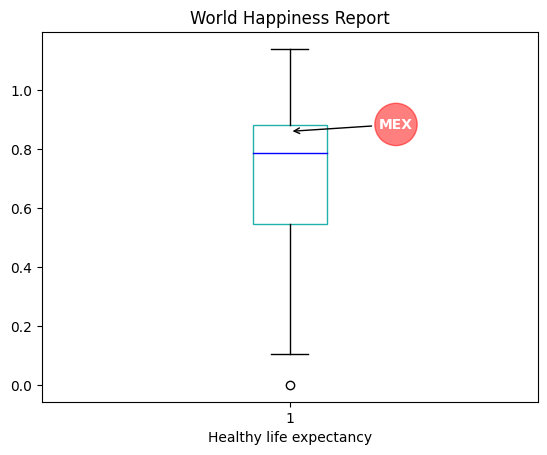

In [6]:
# Construye el box plot para la columna 'valores'
plt.boxplot(happiness['Healthy life expectancy'],  patch_artist=True, boxprops=dict(linewidth=1, color='lightseagreen', facecolor = "white"), medianprops=dict(linewidth=1, color='blue'))

# Agrega etiquetas y título
plt.xlabel('Healthy life expectancy')
plt.title('World Happiness Report')

# Agrega la flecha y el texto
plt.annotate("MEX", xy = (1, mexico["Healthy life expectancy"]), xytext = (1.18, mexico["Healthy life expectancy"] + 0.01), fontsize=10, color='white', fontweight='bold', arrowprops=dict(arrowstyle='->'), bbox=dict(facecolor='red', edgecolor='red', boxstyle='circle', alpha=0.5));

6.	Crea una gráfico circular para analizar en qué medida los factores contribuyen a evaluar la felicidad en México. Para ello, deberás modificar la estructura del dataframe `mexico` obtenido anteriormente.

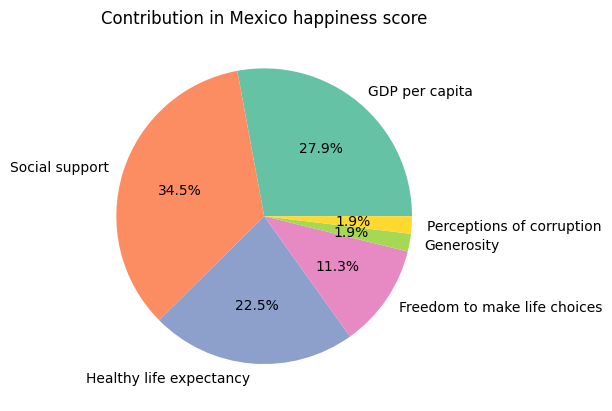

In [25]:
# Acoplando el dataframe para crear un gráfico circular
mexico_transpuesto = mexico.T
mexico_transpuesto = mexico_transpuesto.rename(columns={'Country or region': '', 'Mexico': 'Factors'})

mexico_filtrado = mexico_transpuesto.loc[['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices','Generosity', 'Perceptions of corruption' ]]

# Crear la gráfica 
plt.pie(mexico_filtrado['Factors'], labels = mexico_filtrado.index, colors = plt.cm.Set2.colors, autopct='%1.1f%%' );
# Agrega etiquetas y título
plt.title('Contribution in Mexico happiness score');

7.	Filtra el dataframe para quedarte con 5 países (el más feliz, el menos feliz, México y dos más de tu interés) y visualiza en una misma gráfica los 6 factores.

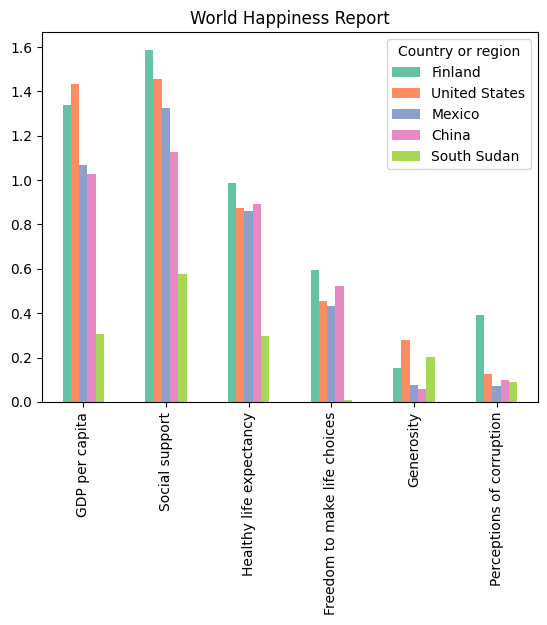

In [74]:
#Filtrar el dataframe para quedarte con 5 países
happiness_filtrado_pais = happiness[(happiness['Country or region'].isin(["Mexico", "United States", "China"])) | (happiness['Country or region'] == happiness['Country or region'][happiness['Score'].idxmax()] ) | (happiness['Country or region'] == happiness['Country or region'][happiness['Score'].idxmin()] )]

happiness_filtrado = happiness_filtrado_pais[['Country or region','GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices','Generosity', 'Perceptions of corruption' ]]

# Establecer la columna 'Country or region' como índice
happiness_filtrado = happiness_filtrado.set_index('Country or region')
happiness_filtrado_transpuesta = happiness_filtrado.T

# Crear la gráfica 
happiness_filtrado_transpuesta.plot(kind = 'bar', color =  plt.cm.Set2.colors)

# Agrega etiquetas y título
plt.title('World Happiness Report');

8.	Crea una matriz de subgráficas de 2 x 3 con scatter plots del puntaje (`score`) versus los 6 factores para determinar qué factor influye más en la evaluación.

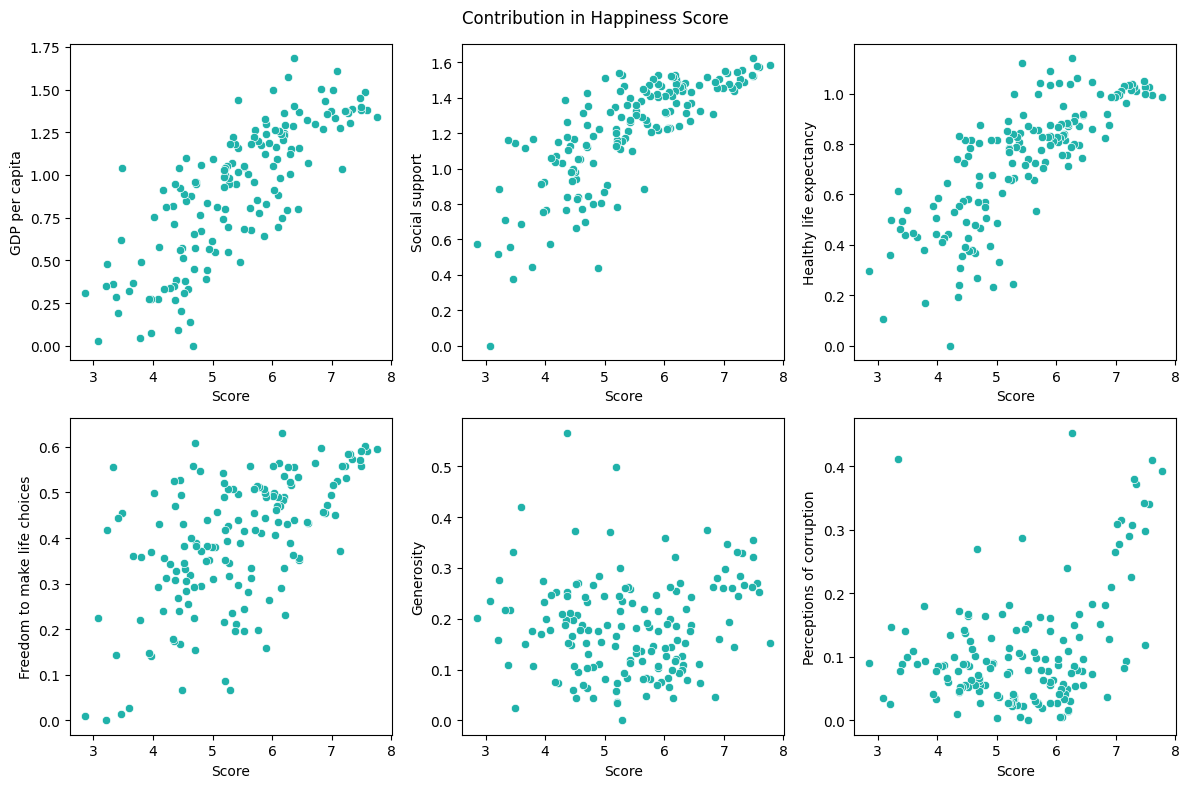

In [86]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

sns.scatterplot(data=happiness, x=happiness["Score"], y=happiness["GDP per capita"], ax = axes[0, 0], color ="lightseagreen");
sns.scatterplot(data=happiness, x=happiness["Score"], y=happiness["Social support"], ax = axes[0, 1], color ="lightseagreen");
sns.scatterplot(data=happiness, x=happiness["Score"], y=happiness["Healthy life expectancy"], ax = axes[0, 2], color ="lightseagreen");
sns.scatterplot(data=happiness, x=happiness["Score"], y=happiness["Freedom to make life choices"], ax = axes[1, 0], color ="lightseagreen");
sns.scatterplot(data=happiness, x=happiness["Score"], y=happiness["Generosity"], ax = axes[1, 1], color ="lightseagreen");
sns.scatterplot(data=happiness, x=happiness["Score"], y=happiness["Perceptions of corruption"], ax = axes[1, 2], color ="lightseagreen");

# Agrega etiquetas y título
plt.suptitle('Contribution in Happiness Score')

# Ajustar el espaciado entre los subgráficos
plt.tight_layout()

9.	Comprueba lo anterior con un heatmap donde incluyas los índices de correlación.

<ipython-input-96-ac2f7eb5d06b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(happiness.corr(), annot=True, cmap='viridis');


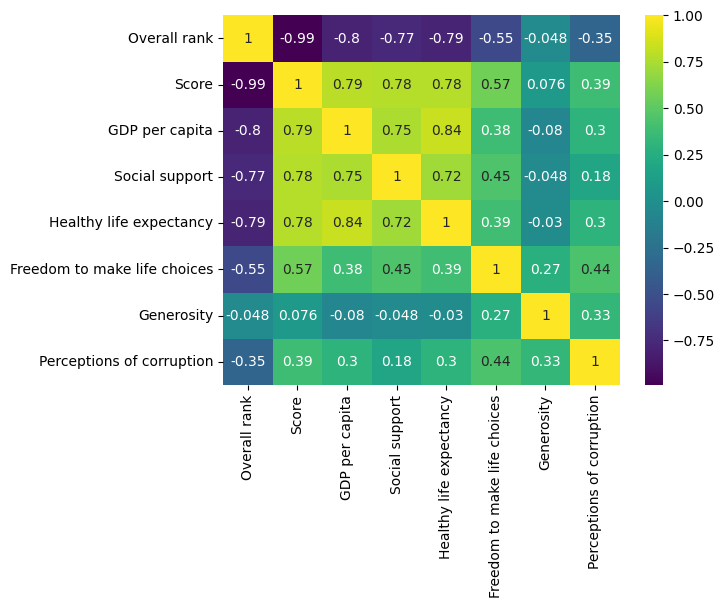

In [96]:
# Crear un heatmap
sns.heatmap(happiness.corr(), annot=True, cmap='viridis');

10.	Combina con el dataframe `metada` (Metadata.csv) para graficar la felicidad promedio por región. 

In [97]:
#Cargamos los archivos para trabajar con ellos
from google.colab import files
uploaded = files.upload()

Metadata =  pd.read_csv('/content/Metadata.csv')

Saving Metadata.csv to Metadata.csv


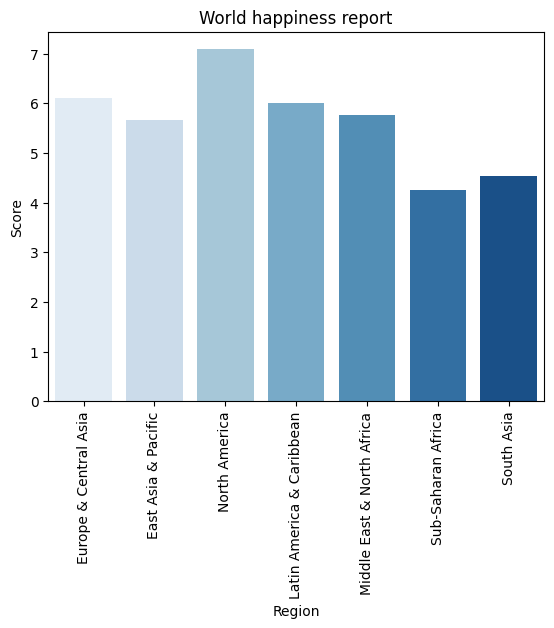

In [131]:
df = pd.merge(happiness, Metadata, left_on='Country or region', right_on='TableName', how='left')

# Crear la gráfica 

sns.barplot(x = df['Region'], y = df['Score'], palette='Blues', errorbar=None);

# Configurar título y etiquetas de los ejes
plt.title('World happiness report');
plt.xlabel('Region');
plt.ylabel('Score');

# Rotar los ejes x
plt.xticks(rotation=90);